In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import read

%matplotlib inline


In [2]:
years_historical = list(range(2015, 2020))

data_historical = read.query_data_range(years=years_historical, pollutants='SO2', expositions=24)
data_2020 = read.read_normalized_data(year=2020, pollutant='SO2', exposition=24)

In [11]:
data_historical.sort_values('timestamp')

,timestamp,station_code,measurement,pollutant,exposition,region
4748,2015-01-01,LbJarczWolaM,2.6,SO2,24,LUBELSKIE
4383,2015-01-01,DsSniezkaObs,1.4,SO2,24,DOLNOSLASKIE
5113,2015-01-01,PmLebaRabkaE,0.8,SO2,24,POMORSKIE
5478,2015-01-01,WmPuszczaBor,1.6,SO2,24,WARMINSKO-MAZURSKIE
5114,2015-01-02,PmLebaRabkaE,1.2,SO2,24,POMORSKIE
...,...,...,...,...,...,...
4016,2019-12-30,LbJarczWolaM,2.6,SO2,24,LUBELSKIE
3651,2019-12-30,DsSniezkaObs,4.0,SO2,24,DOLNOSLASKIE
4382,2019-12-31,PmLebaRabkaE,0.6,SO2,24,POMORSKIE
4017,2019-12-31,LbJarczWolaM,1.6,SO2,24,LUBELSKIE


In [3]:
daily_rolled_means_historical = data_historical.groupby('timestamp') \
    .agg({'measurement': np.nanmean}) \
    .rolling(14) \
    .mean()

daily_rolled_means_2020 = data_2020.groupby('timestamp') \
    .agg({'measurement': np.nanmean}) \
    .rolling(14) \
    .mean()

In [4]:
yearly_data = {year: daily_rolled_means_historical[daily_rolled_means_historical.index.year == year] for year in years_historical}

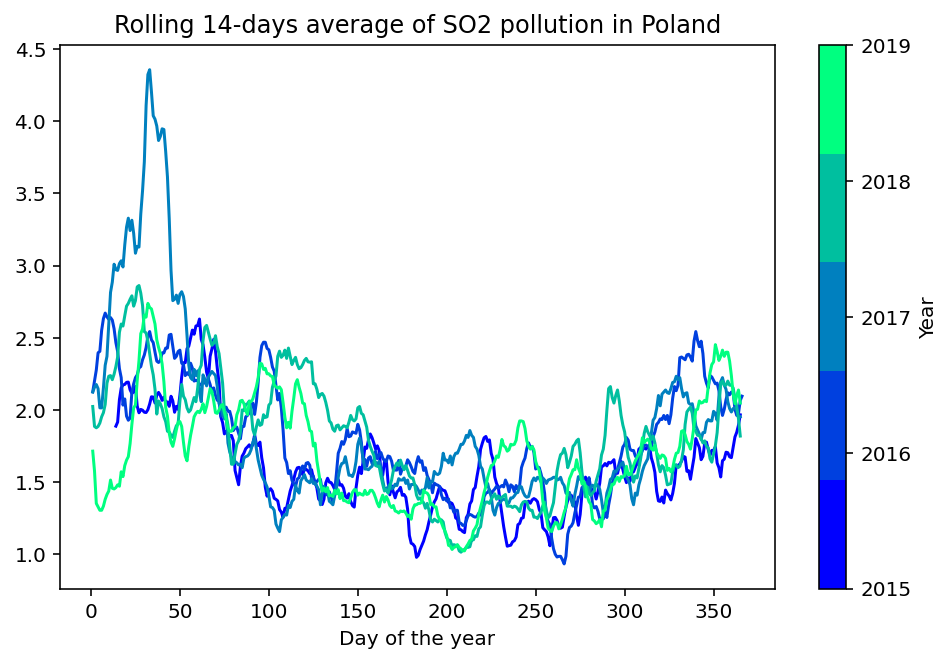

In [12]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=144)

colormap = plt.get_cmap('winter', len(years_historical))

norm = mpl.colors.Normalize(vmin=min(years_historical), vmax=max(years_historical))
sm = mpl.cm.ScalarMappable(norm=norm, cmap=colormap)

for i, year in enumerate(years_historical):
    ax.plot(yearly_data[year].index.dayofyear, yearly_data[year].measurement, color=colormap(i))
    
ax.set_title('Rolling 14-days average of SO2 pollution in Poland')
ax.set_xlabel('Day of the year')

fig.colorbar(sm, ticks=years_historical, label='Year')

plt.show()

In [8]:
over_years_average = daily_rolled_means_historical.groupby(daily_rolled_means_historical.index.dayofyear) \
    .agg({'measurement': [np.nanmean, np.nanstd]})

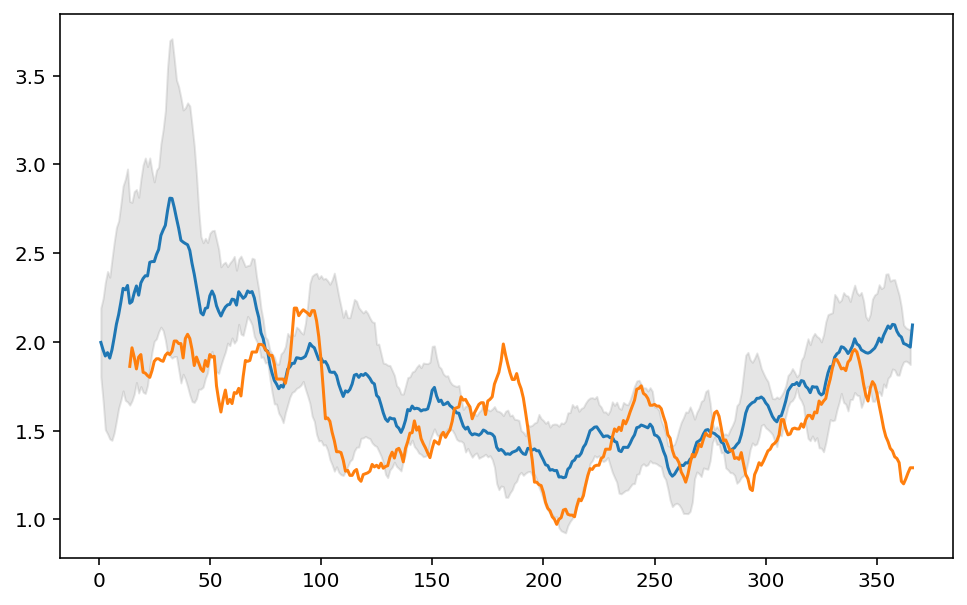

In [9]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=144)

ax.plot(over_years_average.index, over_years_average.measurement.nanmean)
ax.fill_between(over_years_average.index, 
                over_years_average.measurement.nanmean - over_years_average.measurement.nanstd,
               over_years_average.measurement.nanmean + over_years_average.measurement.nanstd,
               color='gray', alpha=0.2)

ax.plot(daily_rolled_means_2020.index.dayofyear, daily_rolled_means_2020.measurement)